In [46]:
import math
import random

import matplotlib.pyplot as plt

In [2]:
def mu(k, v, e):
    return (k - v) * e + v * (1.0 - e)

In [3]:
def sigma(k, e):
    return k * e * (1.0 - e)

In [4]:
def cdf(x, k, v, e):
    return 0.5 * (1.0 + math.erf((x - mu(k, v, e)) / math.sqrt(2.0 * sigma(k, e))))

In [94]:
def update(p, x, k, e):
    tot = 0.0
    for v in range(len(p)):
        pre = p[v]
        post = pre * ((cdf(x + 0.5, k, v, e) - cdf(x - 0.5, k, v, e)) if x > 0 else cdf(0.5, k, v, e))
        p[v] = post
        tot += post
    print(tot)
    for v in range(len(p)):
        p[v] /= tot + 1e-20

In [56]:
def vis(p):
    n = len(p)
    x = [i for i in range(n)]
    plt.plot(x, p)
    plt.ylim(-0.05, 1.05)
    plt.grid()
    plt.show()

31
0.010416666666666668


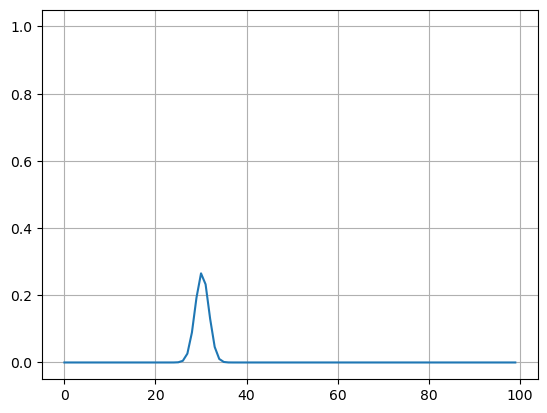

29
0.1209814985180792


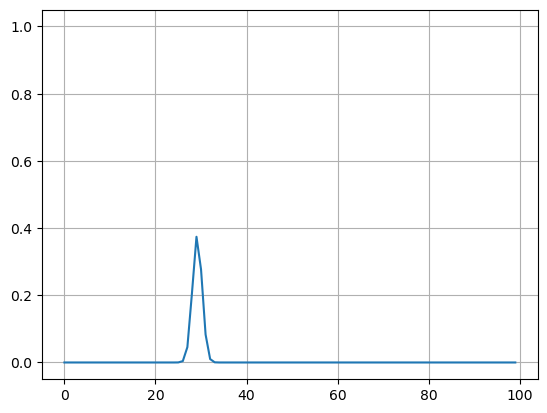

31
0.19356467212095918


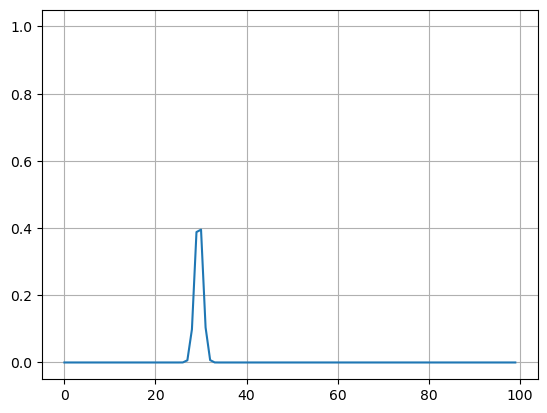

30
0.2367750061361599


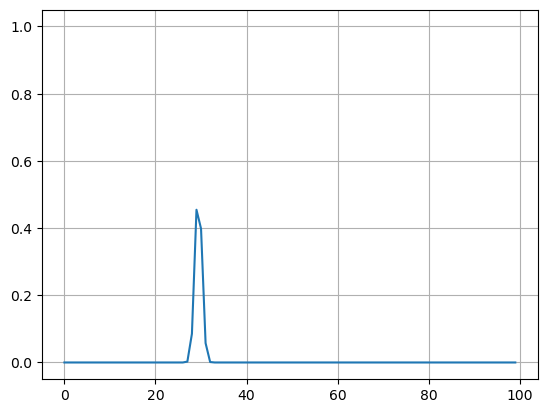

32
0.13709654642105057


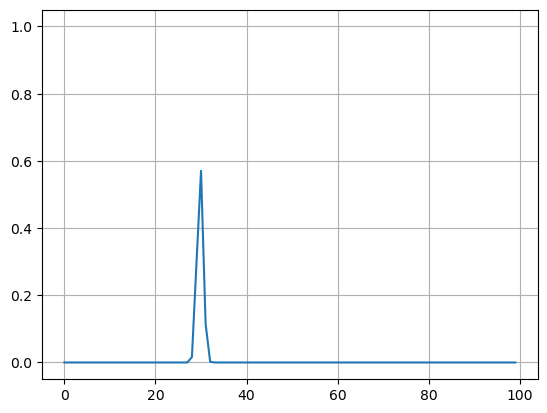

31
0.24674045885338647


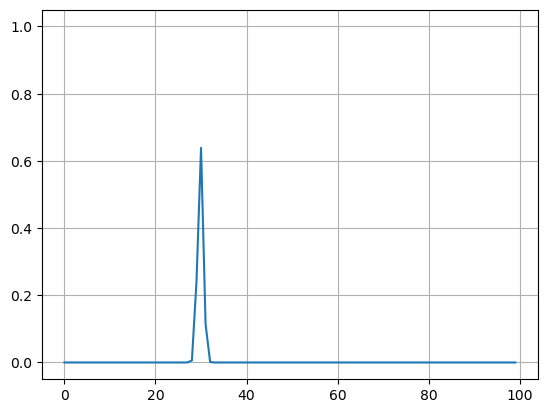

27
0.015369112459975333


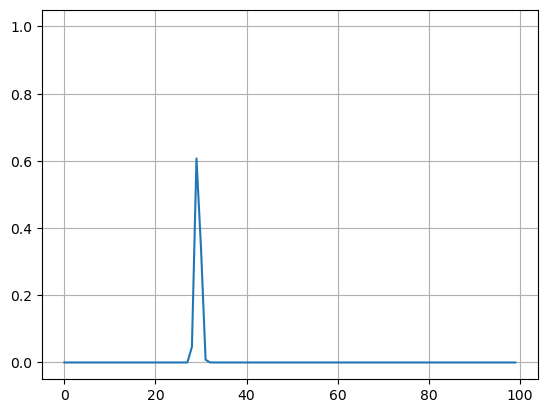

29
0.19857182092287565


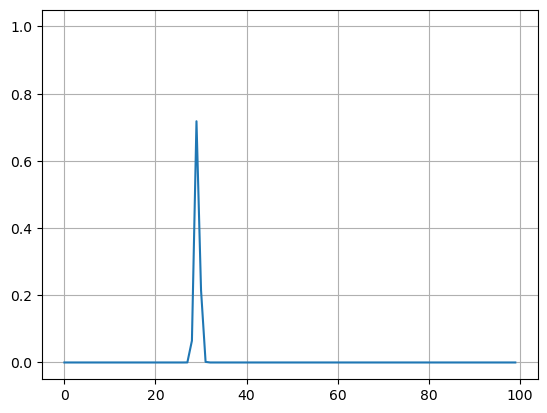

32
0.10840602742447032


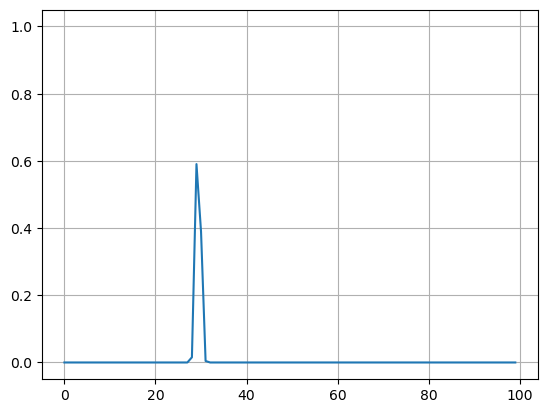

28
0.09156965888535548


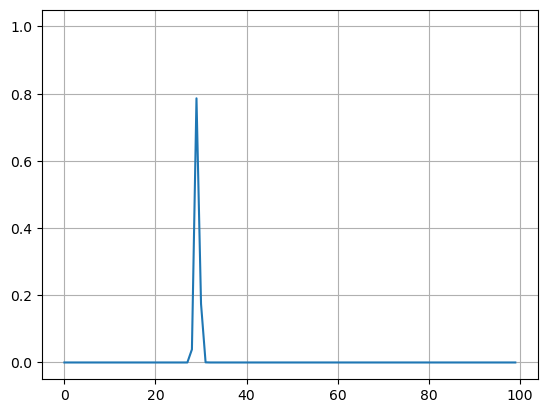

30
0.26766430884338377


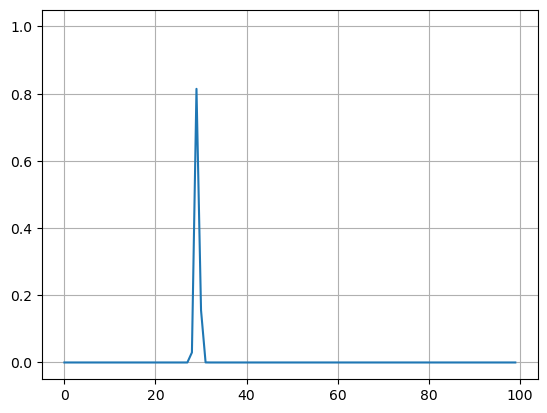

32
0.1039519841195624


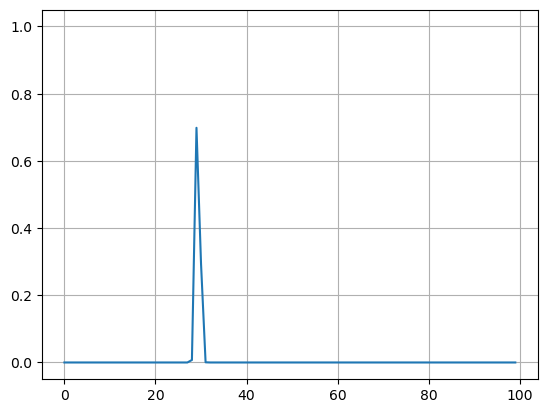

31
0.22219109510196747


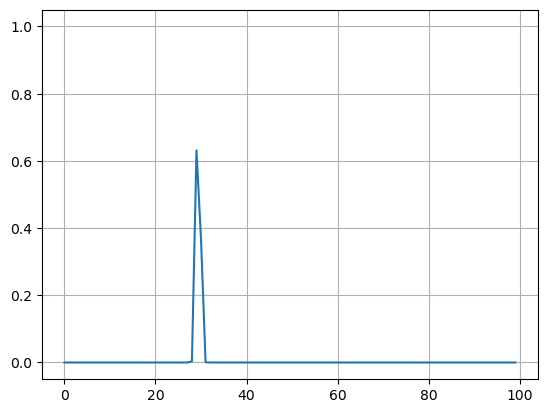

33
0.04662126348218714


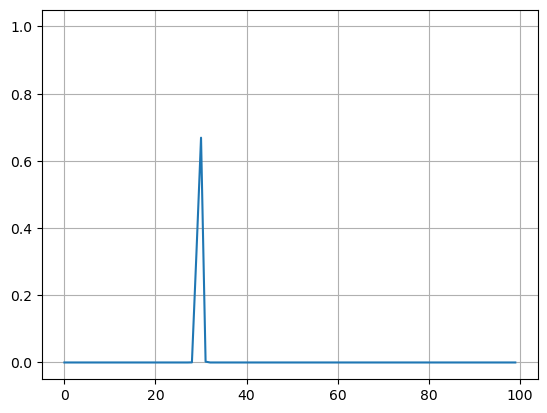

31
0.2513787682427398


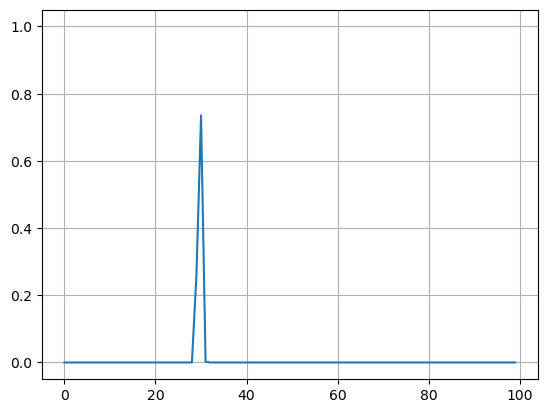

30
0.2484868698600179


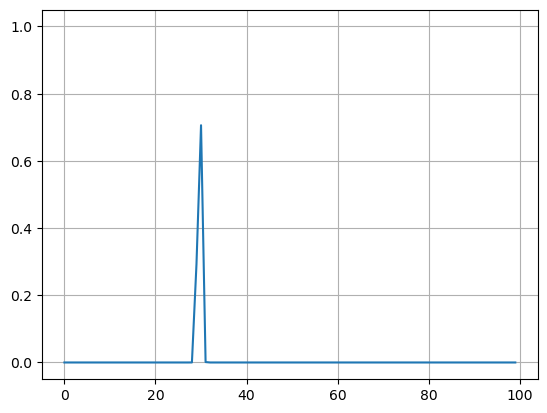

30
0.24978321599136508


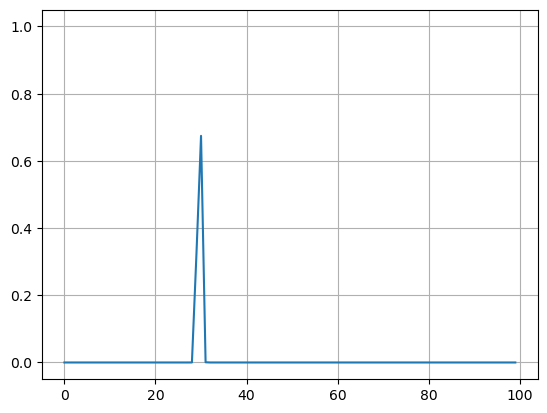

29
0.16153455615089216


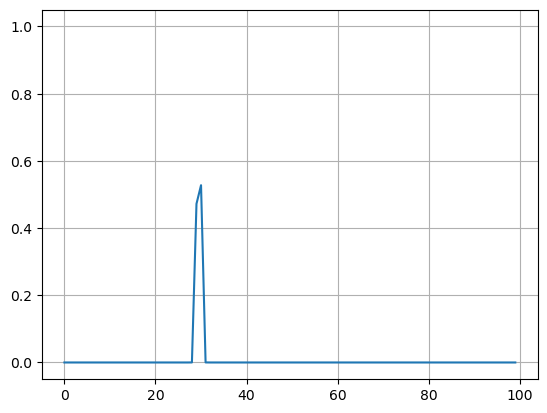

31
0.24062446006378888


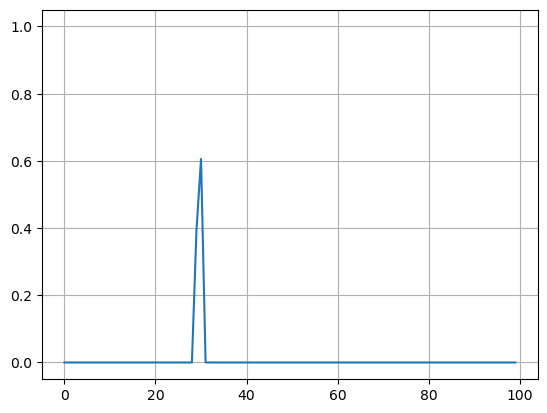

31
0.24653830598566612


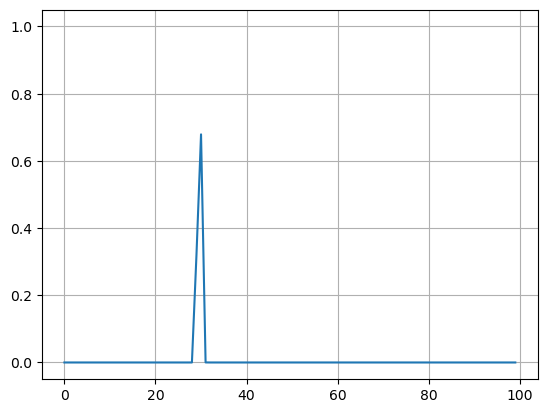

30
0.2509959173530099


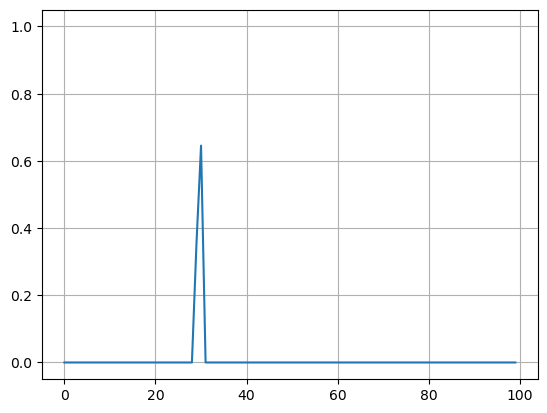

32
0.15826739594797143


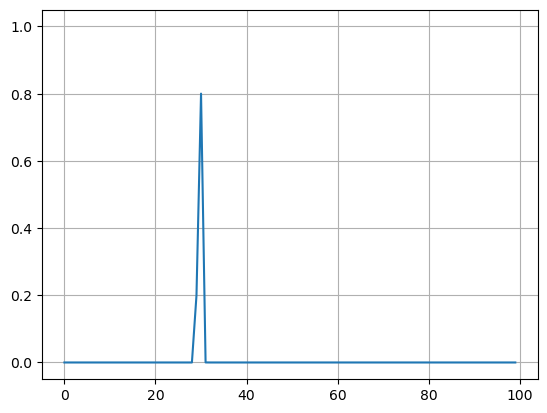

30
0.2463110501424648


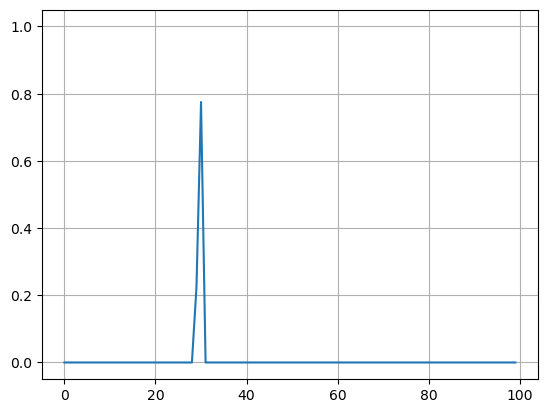

33
0.07168295945839177


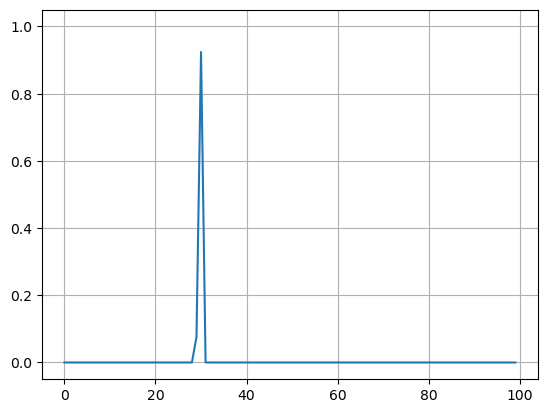

32
0.18809520306793692


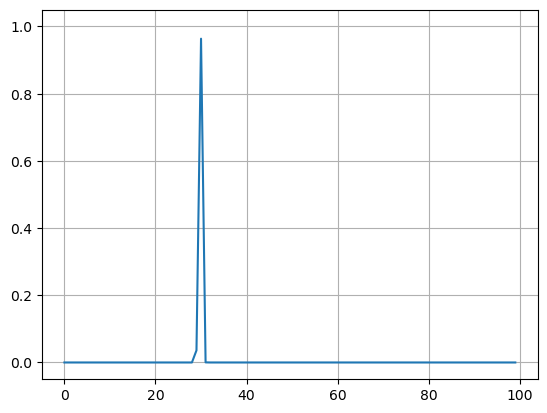

31
0.2735684168125031


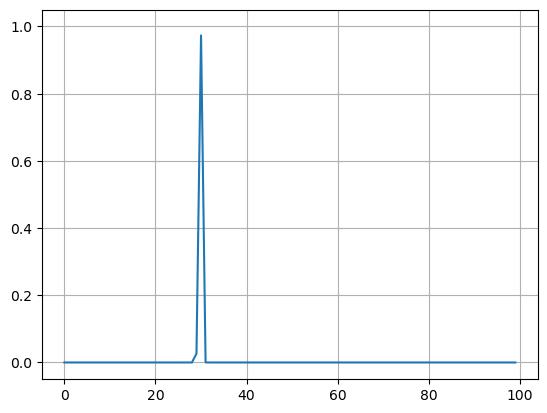

32
0.19340895817681353


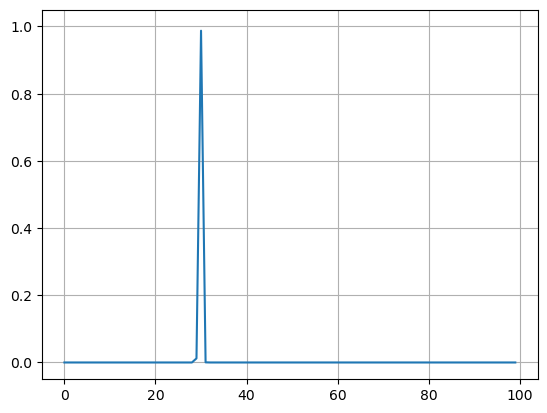

29
0.12763765194354268


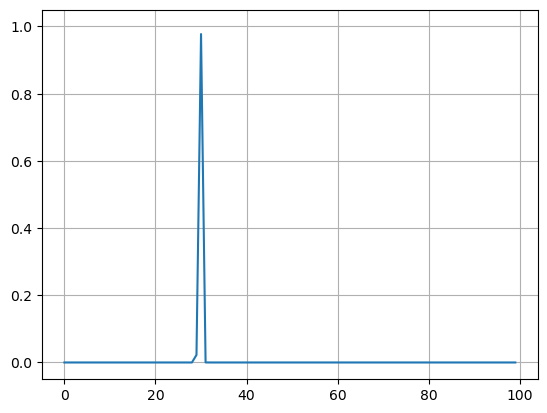

31
0.2746020935129992


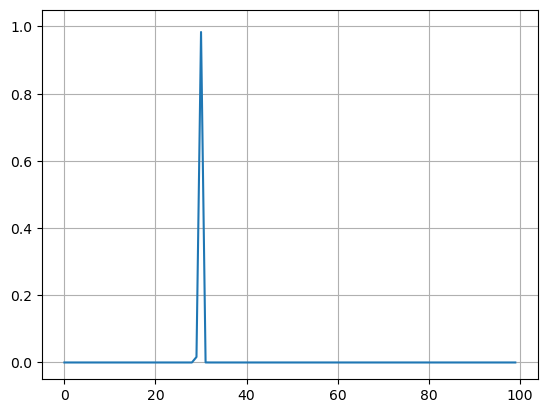

30
0.23922748422192766


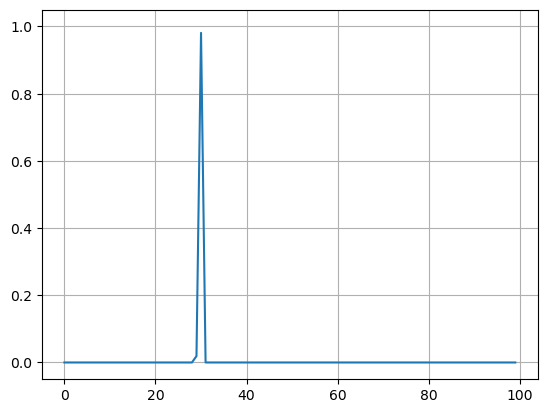

31
0.2748627446623859


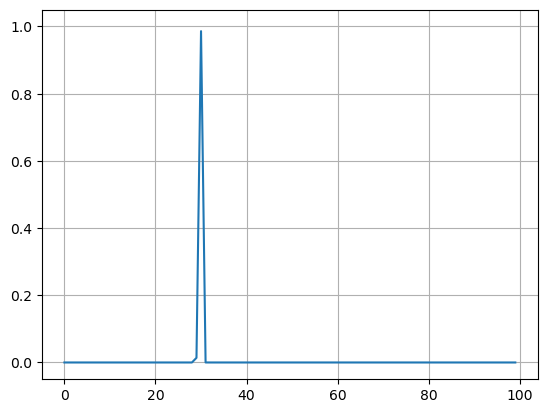

31
0.27524976363424525


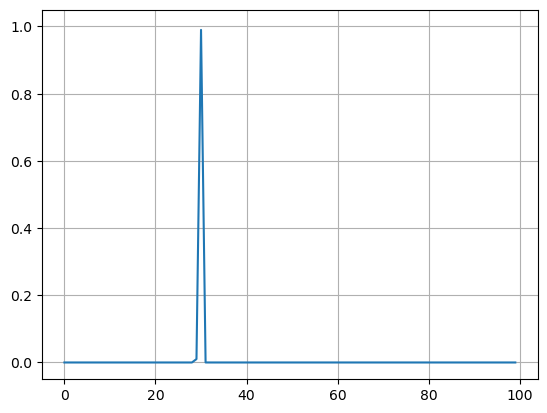

32
0.19513757965082082


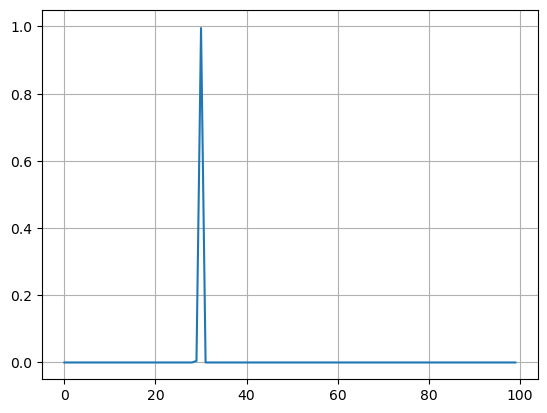

29
0.1268452959264659


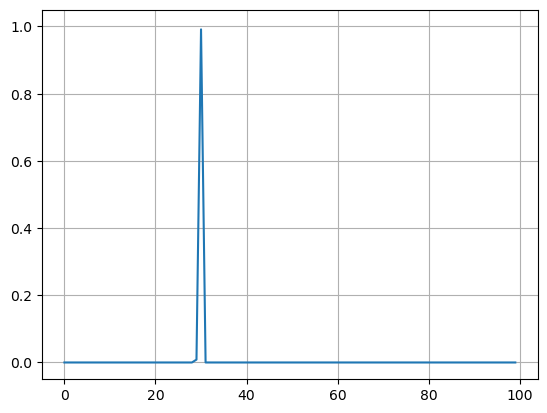

31
0.27565255223440693


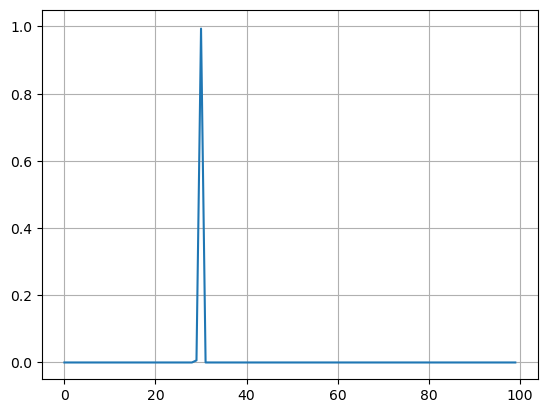

28
0.041502604847365863


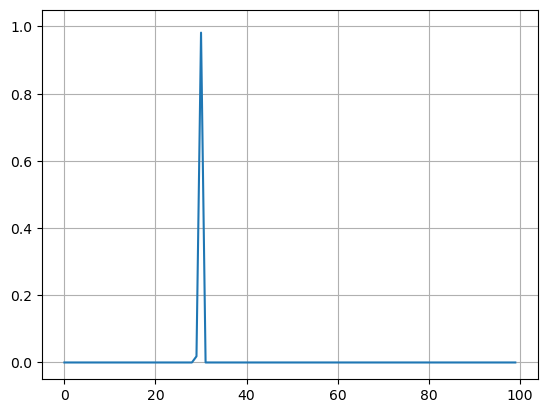

30
0.23931508078420394


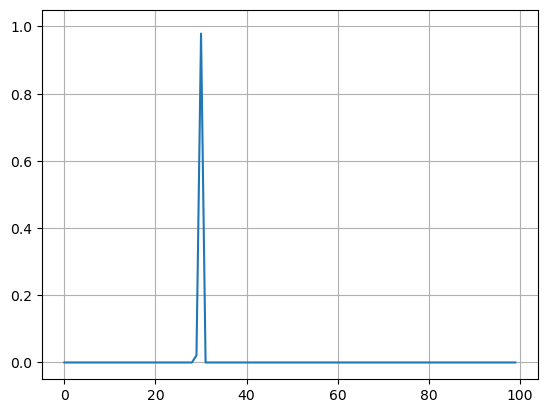

30
0.23942777972094817


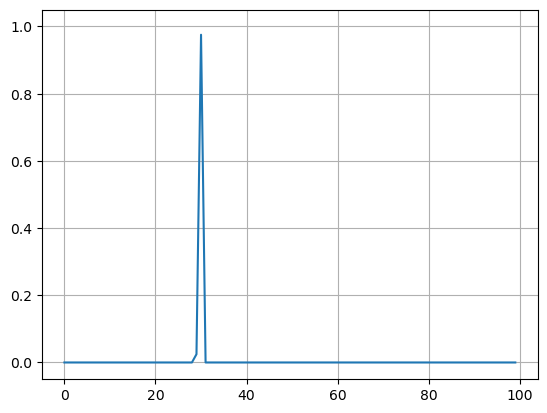

29
0.12901787594667274


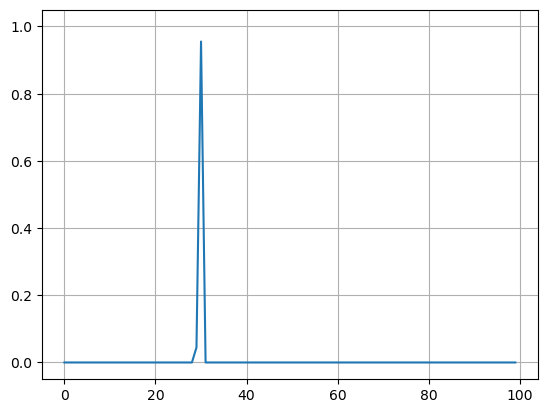

30
0.2403380044842217


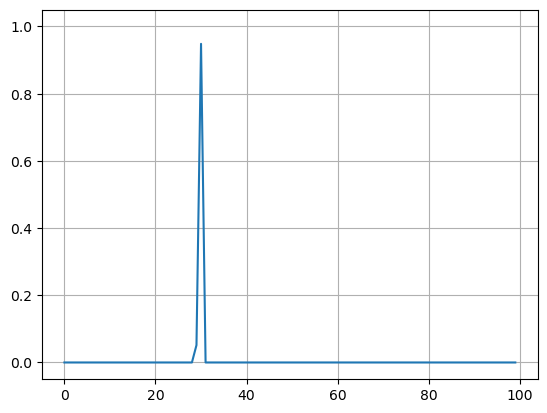

32
0.19068697177703678


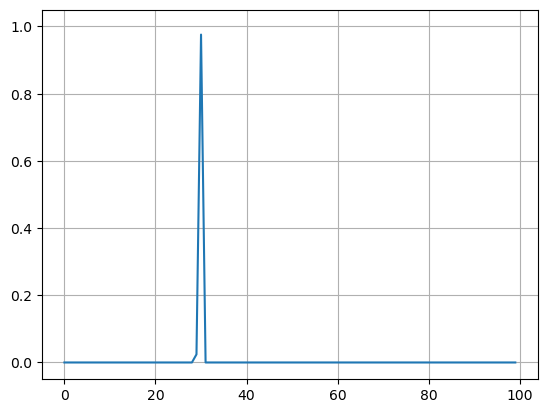

33
0.08394959084078678


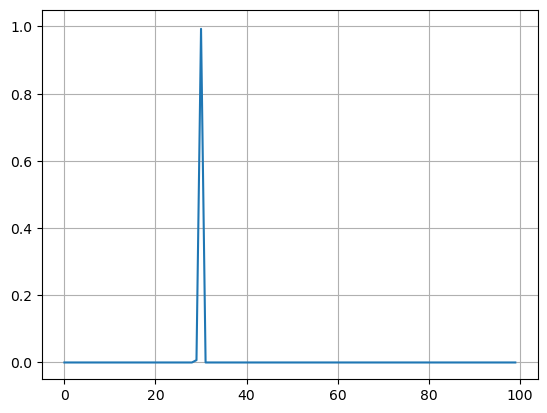

32
0.19547140895249615


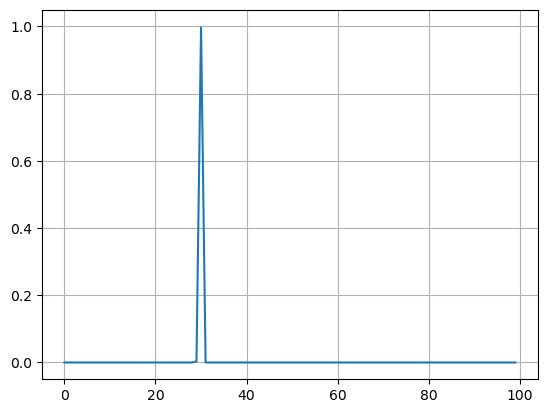

31
0.2760600854450409


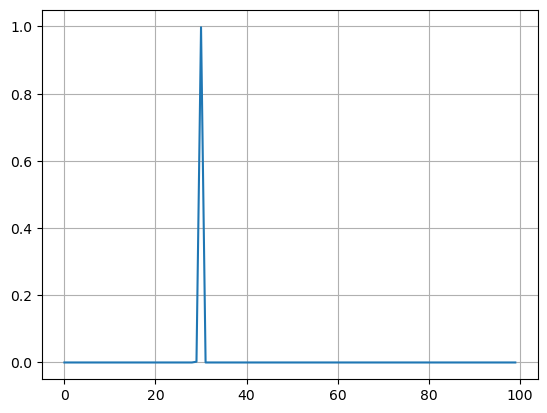

31
0.2761255762531027


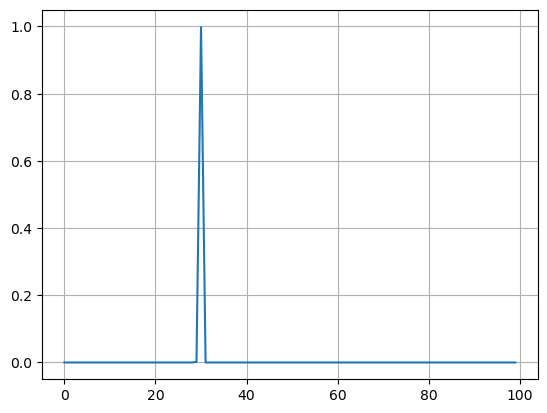

31
0.2761732436542225


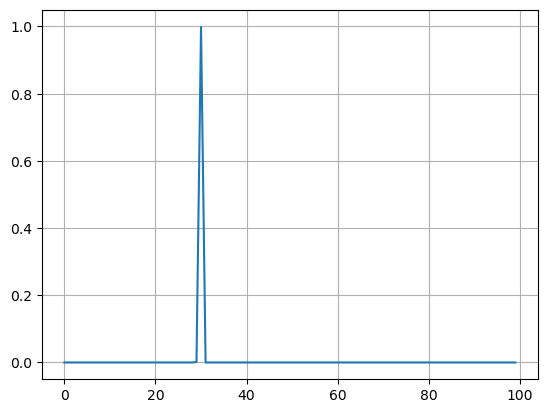

30
0.23865373933123857


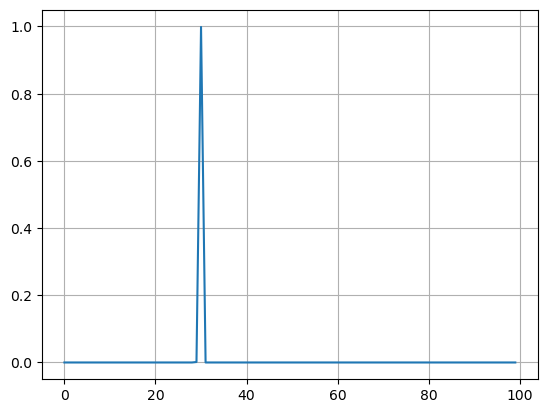

33
0.08534034634087036


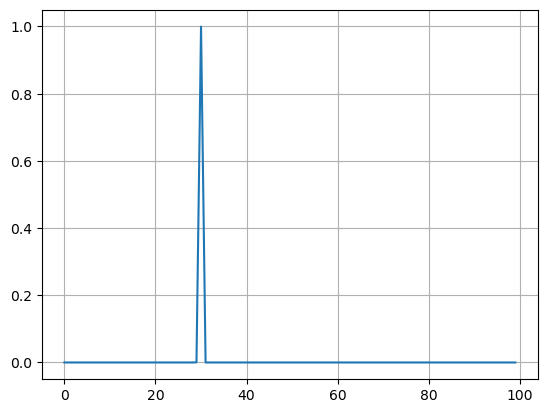

34
0.022774044854007875


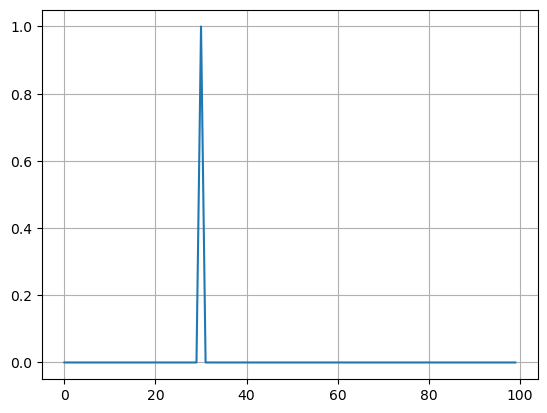

31
0.27629481095415864


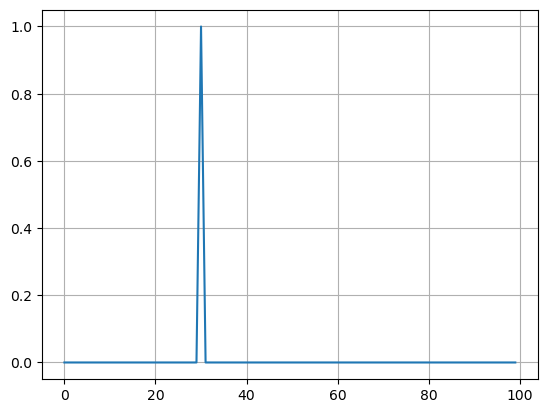

In [95]:
n = 100
p = [1.0 / n for _ in range(n)]
e = 0.02

k = 100
v = 30
for i in range(50):
    x = round(random.gauss(mu(k, v, e), math.sqrt(sigma(k, e))))
    print(x)
    update(p, x, k, e)
    vis(p)

In [89]:
x = 6
cdf(x + 0.5, k, v, e) - cdf(x - 0.5, k, v, e)

1.4988010832439613e-15

In [101]:
test_case_id = 0
input_file_path = f"tools/in/{test_case_id:04}.txt"

polyominoes = []
ans = []

with open(input_file_path, "r") as f:
    buf = f.readline().split()
    n = int(buf[0])
    m = int(buf[1])
    e = float(buf[2])
    for _ in range(m):
        buf = list(map(int, f.readline().split()))
        d = buf[0]
        poly = [None for _ in range(d)]
        for i in range(d):
            poly[i] = (buf[i * 2 + 1], buf[i * 2 + 2])
        polyominoes.append(poly)
    for _ in range(m):
        f.readline().split() # skip
    for _ in range(n):
        ans.append(list(map(int, f.readline().split())))

In [107]:
cell_placed_num_prob = [[[1.0 if k == 0 else 0.0 for k in range(m + 1)] for _ in range(n)] for _ in range(n)]
for k in range(m):
    total_possible_placement_num = 0
    possible_placement_num = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            can_place = True
            for c in polyominoes[k]:
                x = i + c[0]
                y = j + c[1]
                if not (x < n and y < n):
                    can_place = False
                    break
            if can_place:
                total_possible_placement_num += 1
                for c in polyominoes[k]:
                    x = i + c[0]
                    y = j + c[1]
                    possible_placement_num[x][y] += 1
    for i in range(n):
        for j in range(n):
            cell_placed_prob = possible_placement_num[i][j] / total_possible_placement_num
            for l in range(m - 1, -1, -1):
                p0 = cell_placed_num_prob[i][j][l]
                p1 = cell_placed_num_prob[i][j][l + 1]
                cell_placed_num_prob[i][j][l] = p0 * (1.0 - cell_placed_prob)
                cell_placed_num_prob[i][j][l + 1] = p1 + p0 * cell_placed_prob

In [121]:
def vis_prob(prob, n, k):
    prob_k = [[None for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            prob_k[i][j] = prob[i][j][k]
    plt.imshow(prob_k, cmap="jet")
    plt.colorbar()
    plt.title(f"Probability of v(s) = {k}")
    plt.show()

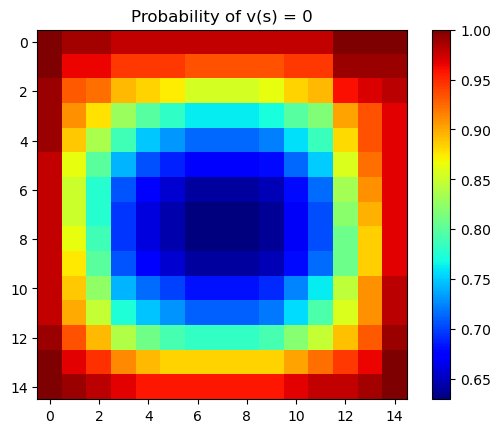

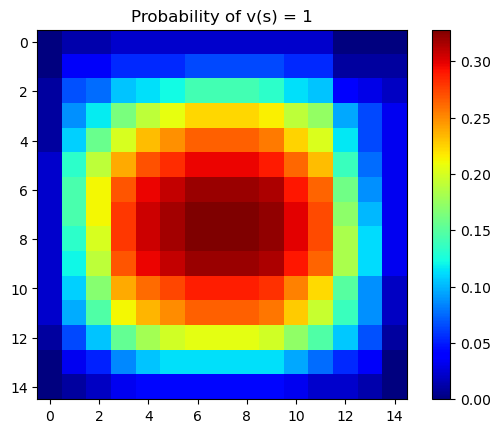

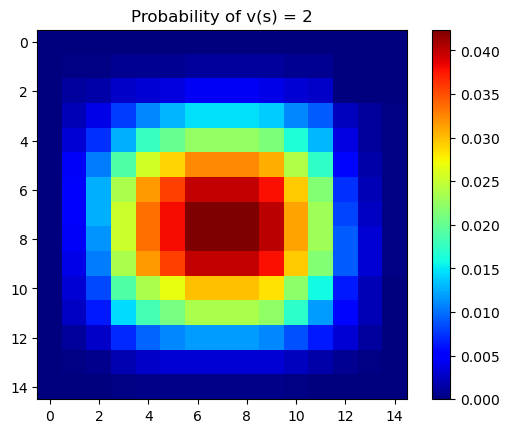

In [122]:
for k in range(m+1):
    vis_prob(cell_placed_num_prob, n, k)

In [123]:
def observe(s, ans, e):
    v_sum = 0
    for c in s:
        v_sum += ans[c[0]][c[1]]
    res = max(0, round(random.gauss(mu(len(s), v_sum, e), math.sqrt(sigma(len(s), e)))))
    return res

In [138]:
s = [(i, j) for i in range(7, 12) for j in range(4, 9)]

In [139]:
prob_s = [1.0 if k == 0 else 0.0 for k in range(len(s) * m + 1)]
for i, j in s:
    prob = cell_placed_num_prob[i][j]
    for k in range(len(s) * m - m, -1, -1):
        pk = prob_s[k]
        prob_s[k] = 0.0
        for l in range(m + 1):
            pl = prob_s[k + l]
            prob_s[k + l] = pl + pk * prob[l]

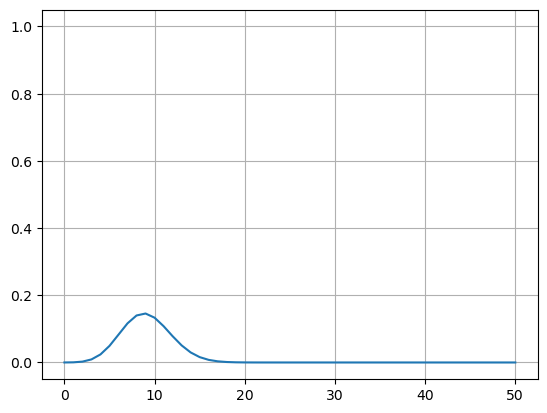

In [143]:
vis(prob_s)

In [157]:
res = observe(s, ans, e)
print(res)

1


0.0005023131406311286


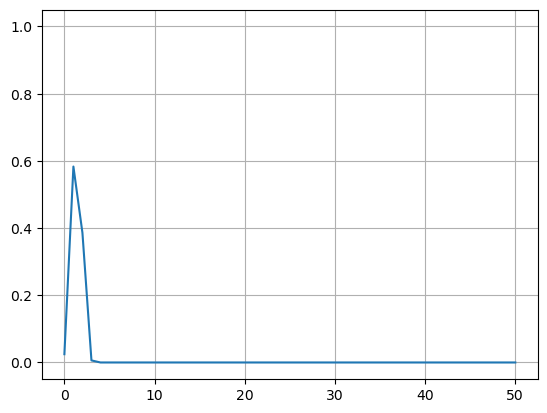

In [158]:
prob_s_post = [x for x in prob_s]
update(prob_s_post, res, len(s), e)
vis(prob_s_post)

In [146]:
cell_placed_num_prob_post = [[[cell_placed_num_prob[i][j][k] for k in range(m + 1)] for _ in range(n)] for _ in range(n)]


In [159]:
prob_s_post

[0.024654749716623993,
 0.5831035309463438,
 0.38606950743353824,
 0.006170301089728052,
 1.9108030107865024e-06,
 1.0755099221115028e-11,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]